In [1]:
# Student: Casey Cook, ID#: 801085944, Homework 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_cost(x, y, theta, m): # Compute cost for linear regression.

    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors) # cost function, sum of squared errors
    return J

In [3]:
def gradient_descent(x, y, a, b, theta, alpha, iterations, lengthTrain, lengthTest): # Compute cost for linear regression.

    cost_history = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / lengthTrain) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta, lengthTrain)
        cost_history_test[i] = compute_cost(a, b, theta, lengthTest) # added to compute the cost of the test set after every update of theta values through training
        
    return theta, cost_history, cost_history_test

In [4]:
def data_organize(data,length,scaling,problem): # Organize data into matrix for use with gradient descent algorithm
    
    # Create a list full of zeros with length of # of columns in dataset
    cols = len(data.columns)
    C = [0]*cols
    
    for i in range(len(C)):
        B = data.values[:, i]
        X = B.reshape(length, 1)
        C[i] = X
    
    # if scaling is activated, scales price, specific to dataset in 1a)
    end = int(len(C) - 1)
    if scaling == 1:
        C[0]=C[0]*10**(-3) 
        Y = data.values[:, end]*10**(-6)
    else:
        Y = data.values[:, end]

    initial = np.ones((length, 1)) # Create a 99x1 array of ones
    
    # PROBLEM IS HERE WITH .hstack(), can .hstack() be dynamic?
    if problem == 0:
        X_tot = np.hstack((initial,C[0],C[1],C[2],C[3],C[4]))
    else:
        X_tot = np.hstack((initial,C[0],C[1],C[2],C[3],C[4],C[5],C[6],C[7],C[8],C[9]))

      
    return X_tot, Y

In [5]:
# Import housing list 
housing = pd.read_csv('Housing.csv')
print(housing.shape)

# 1a Variables
varlist1 = ['area','bedrooms','bathrooms','stories','parking','price']

# 1b Variables
varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']

housing.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Binary Variables DOES THIS ACTUALLY WORK?
binary_varlist = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning','prefarea']

#varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning',
# Defining the map function
         
def binary_map(x):
         return x.map({'yes':1,"no":0})
         
# Applying the function to the housing list
housing[binary_varlist]=housing[binary_varlist].apply(binary_map)

# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into two sets specified in train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, test_size = 0.3, train_size = 0.7, random_state = 1 )

# Get the lengths of the training and test set
mTrain = len(df_train)
mTest = len(df_test)

print('Dimensions of df_train:',df_train.shape)
print('Dimensions of df_train:',df_test.shape)

Dimensions of df_train: (381, 13)
Dimensions of df_train: (164, 13)


In [8]:
df_NewtrainA = df_train[varlist1]
df_NewtestA = df_test[varlist1]

df_NewtrainB = df_train[varlist2]
df_NewtestB = df_test[varlist2]

print('Dimensions of training set used in 1a:', df_NewtrainA.shape)
print('Dimensions of training set used in 1b:', df_NewtrainB.shape)
#print(df_NewtrainA[: 5])
print(df_NewtrainB[: 3])

Dimensions of training set used in 1a: (381, 6)
Dimensions of training set used in 1b: (381, 12)
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
180  4500         4          2        1         0          0         1   
189  3540         2          1        1         0          1         1   
93   7200         3          2        1         1          0         1   

     hotwaterheating  airconditioning  parking  prefarea    price  
180                0                1        2         0  5215000  
189                0                0        0         0  5040000  
93                 0                1        3         0  6300000  


In [9]:
xTrainA, yTrainA = data_organize(df_NewtrainA,mTrain,1,0)
xTestA, yTestA = data_organize(df_NewtestA,mTest,1,0)

mTrainB = len(df_NewtrainB)
mTestB = len(df_NewtestB)

xTrainB, yTrainB = data_organize(df_NewtrainB,mTrainB,1,1)
xTestB, yTestB = data_organize(df_NewtrainB,mTrain,1,1)

In [10]:
thetaA = np.zeros(6) # row vector for Theta initialized to 0
thetaB = np.zeros(11)
iterations = 200;

alpha1 = 0.01; # Comparing 3 different training rates
alpha2 = 0.02;
alpha3 = 0.04;

In [11]:
# Run Cost History and Gradient Descent algorithms for training data
thetaTrainA1, cost_historyTrainA1, cost_historyTestA1 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.01, iterations, mTrain, mTest)
thetaTrainA2, cost_historyTrainA2, cost_historyTestA2 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.03, iterations, mTrain, mTest)
thetaTrainA3, cost_historyTrainA3, cost_historyTestA3 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.04, iterations, mTrain, mTest)

thetaTrainB1, cost_historyTrainB1, cost_historyTestB1 = gradient_descent(xTrainB, yTrainB, xTestB, yTestB, thetaB, 0.01, iterations, mTrainB, mTestB)
thetaTrainB2, cost_historyTrainB2, cost_historyTestB2 = gradient_descent(xTrainB, yTrainB, xTestB, yTestB, thetaB, 0.03, iterations, mTrainB, mTestB)
thetaTrainB3, cost_historyTrainB3, cost_historyTestB3 = gradient_descent(xTrainB, yTrainB, xTestB, yTestB, thetaB, 0.04, iterations, mTrainB, mTestB)

print('Final value of theta1 =', thetaTrainA1)
print('Cost History for Training1:', cost_historyTrainA1[: 10]) # Here the cost history just blows up without a small enough learning rate
print('Cost History for Testing1:', cost_historyTestA1[: 10])

Final value of theta1 = [0.13704238 0.33468751 0.35999223 0.52877376 0.5115619  0.31372862]
Cost History for Training1: [4.44256749 1.99836155 1.29819849 1.09388494 1.03067776 1.00775209
 0.99644672 0.98860956 0.98191747 0.97570414]
Cost History for Testing1: [4.8857971  2.35423482 1.55919425 1.29157565 1.19184296 1.14939921
 1.12835867 1.11616443 1.10799824 1.10182766]


In [12]:
###### PROBLEM 1a ##############################################################################

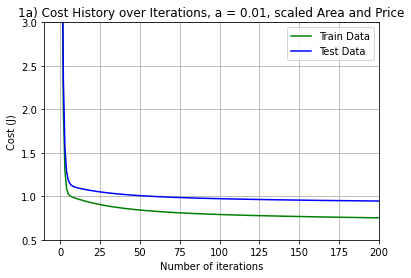

In [13]:
plt.plot(range(1, iterations + 1),cost_historyTrainA1, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA1, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1a) Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.xlim([-10, 200])
plt.ylim([0.5, 3])
plt.legend()

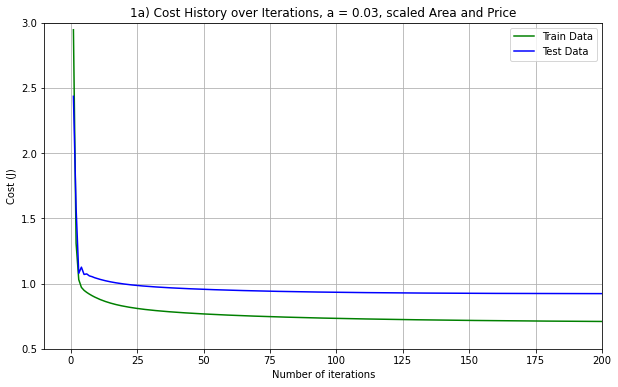

In [14]:
plt.plot(range(1, iterations + 1),cost_historyTrainA2, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA2, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1a) Cost History over Iterations, a = 0.03, scaled Area and Price')
plt.xlim([-10, 200])
plt.ylim([0.5, 3])
plt.legend()

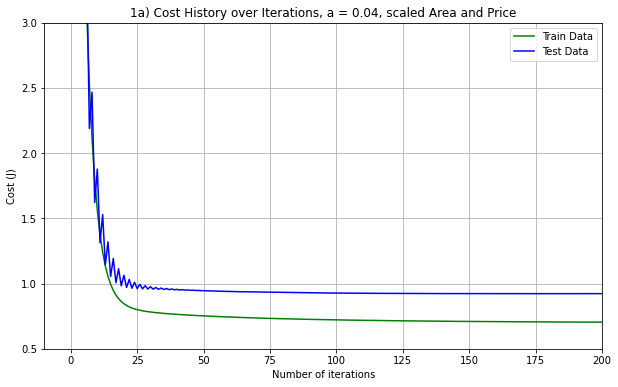

In [15]:
plt.plot(range(1, iterations + 1),cost_historyTrainA3, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA3, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1a) Cost History over Iterations, a = 0.04, scaled Area and Price')
plt.xlim([-10, 200])
plt.ylim([0.5, 3])
plt.legend()

In [16]:
###### PROBLEM 1b ##############################################################################

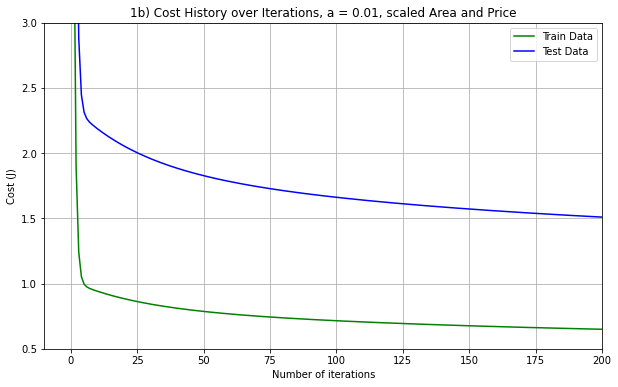

In [17]:
plt.plot(range(1, iterations + 1),cost_historyTrainB1, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestB1, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1b) Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.xlim([-10, 200])
plt.ylim([0.5, 3])
plt.legend()

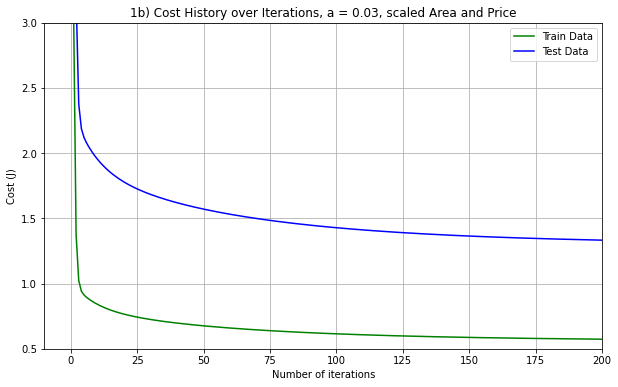

In [18]:
plt.plot(range(1, iterations + 1),cost_historyTrainB2, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestB2, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1b) Cost History over Iterations, a = 0.03, scaled Area and Price')
plt.xlim([-10, 200])
plt.ylim([0.5, 3])
plt.legend()

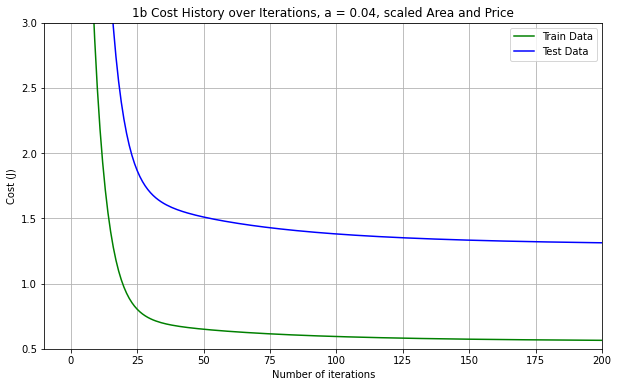

In [19]:
plt.plot(range(1, iterations + 1),cost_historyTrainB3, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestB3, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1b Cost History over Iterations, a = 0.04, scaled Area and Price')
plt.xlim([-10, 200])
plt.ylim([0.5, 3])
plt.legend()

In [20]:
###### PROBLEM 2a ##############################################################################

In [37]:
#As you know, there are two common ways of rescaling:
#1. Min-Max scaling
#2. Standardisation (mean-0, sigma-1)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']
varlist3 = ['area', 'stories', 'bedrooms','bathrooms','parking','price']
varlist4 = ['area', 'bedrooms', 'bathrooms', 'stories','price']

df_NewtrainCS = df_train[varlist1]
df_NewtestCS = df_test[varlist1]

df_NewtrainCM = df_train[varlist1]
df_NewtestCM = df_test[varlist1]

df_NewtrainDS = df_train[varlist2]
df_NewtestDS = df_test[varlist2]

df_NewtrainDM = df_train[varlist2]
df_NewtestDM = df_test[varlist2]

# Standard Scaler
scaler = StandardScaler()
df_NewtrainCS[varlist3] = scaler.fit_transform(df_NewtrainCS[varlist3])
df_NewtestCS[varlist3] = scaler.fit_transform(df_NewtestCS[varlist3])

df_NewtrainDS[varlist4] = scaler.fit_transform(df_NewtrainDS[varlist4])
df_NewtestDS[varlist4] = scaler.fit_transform(df_NewtestDS[varlist4])

# MinMax Scaler
scaler = MinMaxScaler()
df_NewtrainCM[varlist3] = scaler.fit_transform(df_NewtrainCM[varlist3])
df_NewtestCM[varlist3] = scaler.fit_transform(df_NewtestCM[varlist3])

df_NewtrainDM[varlist4] = scaler.fit_transform(df_NewtrainDM[varlist4])
df_NewtestDM[varlist4] = scaler.fit_transform(df_NewtestDM[varlist4])

#df_NewtrainA[varlist3] = scaler.fit_transform(df_NewtrainA[varlist3])
df_NewtrainDS.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
180,-0.326835,1.323414,1.398729,-0.928204,0,0,1,0,1,2,0,0.244221
189,-0.754726,-1.302736,-0.582370,-0.928204,0,1,1,0,0,0,0,0.147043
93,0.876611,0.010339,1.398729,-0.928204,1,0,1,0,1,3,0,0.846724
444,-0.941929,0.010339,-0.582370,0.254558,0,0,0,0,0,0,0,-0.863607
81,-0.549695,0.010339,1.398729,0.254558,1,0,1,0,1,1,0,1.021644
345,-1.434450,0.010339,-0.582370,0.254558,1,0,1,0,0,0,1,-0.513767
314,-0.531866,-1.302736,-0.582370,0.254558,1,0,0,0,0,1,0,-0.377718
115,1.233187,0.010339,-0.582370,-0.928204,1,1,1,0,1,2,1,0.691239
286,-1.090354,0.010339,-0.582370,-0.928204,1,0,1,0,0,0,1,-0.299975
400,-0.767207,-1.302736,-0.582370,-0.928204,1,0,0,0,0,1,1,-0.708123


In [42]:
xTrainCS, yTrainCS = data_organize(df_NewtrainCS,mTrain,0,0)
xTestCS, yTestCS = data_organize(df_NewtestCS,mTest,0,0)

xTrainCM, yTrainCM = data_organize(df_NewtrainCM,mTrain,0,0)
xTestCM, yTestCM = data_organize(df_NewtestCM,mTest,0,0)

xTrainDS, yTrainDS = data_organize(df_NewtrainDS,mTrain,0,1)
xTestDS, yTestDS = data_organize(df_NewtestDS,mTest,0,1)

xTrainDM, yTrainDM = data_organize(df_NewtrainDM,mTrain,0,1)
xTestDM, yTestDM = data_organize(df_NewtestDM,mTest,0,1)

print('xTrainDS: ',np.shape(xTrainDS), xTrainDS[: 5])
print('yTrainDS: ',np.shape(yTrainDS), yTrainDS[: 5])

xTrainDS:  (381, 11) [[ 1.         -0.32683478  1.32341426  1.39872906 -0.92820446  0.
   0.          1.          0.          1.          2.        ]
 [ 1.         -0.75472644 -1.30273592 -0.58237046 -0.92820446  0.
   1.          1.          0.          0.          0.        ]
 [ 1.          0.87661052  0.01033917  1.39872906 -0.92820446  1.
   0.          1.          0.          1.          3.        ]
 [ 1.         -0.94192904  0.01033917 -0.58237046  0.25455774  0.
   0.          0.          0.          0.          0.        ]
 [ 1.         -0.54969502  0.01033917  1.39872906  0.25455774  1.
   0.          1.          0.          1.          1.        ]]
yTrainDS:  (381,) [ 0.24422092  0.147043    0.84672405 -0.8636074   1.02164431]


In [43]:
thetaA = np.zeros(6) # row vector for Theta initialized to 0
thetaB = np.zeros(11)
iterations = 500;

alpha1 = 0.01; # Comparing 3 different training rates
alpha2 = 0.02;
alpha3 = 0.04;

In [47]:
thetaTrainC1S, cost_historyTrainC1S, cost_historyTestC1S = gradient_descent(xTrainCS, yTrainCS, xTestCS, yTestCS, thetaA, 0.01, iterations, mTrain, mTest)
thetaTrainC2S, cost_historyTrainC2S, cost_historyTestC2S = gradient_descent(xTrainCS, yTrainCS, xTestCS, yTestCS, thetaA, 0.03, iterations, mTrain, mTest)
thetaTrainC2S, cost_historyTrainC3S, cost_historyTestC3S = gradient_descent(xTrainCS, yTrainCS, xTestCS, yTestCS, thetaA, 0.1, iterations, mTrain, mTest)

thetaTrainC1M, cost_historyTrainC1M, cost_historyTestC1M = gradient_descent(xTrainCM, yTrainCM, xTestCM, yTestCM, thetaA, 0.01, iterations, mTrain, mTest)
thetaTrainC2M, cost_historyTrainC2M, cost_historyTestC2M = gradient_descent(xTrainCM, yTrainCM, xTestCM, yTestCM, thetaA, 0.03, iterations, mTrain, mTest)
thetaTrainC2M, cost_historyTrainC3M, cost_historyTestC3M = gradient_descent(xTrainCM, yTrainCM, xTestCM, yTestCM, thetaA, 0.1, iterations, mTrain, mTest)

thetaTrainD1S, cost_historyTrainD1S, cost_historyTestD1S = gradient_descent(xTrainDS, yTrainDS, xTestDS, yTestDS, thetaB, 0.01, iterations, mTrain, mTest)
thetaTrainD2S, cost_historyTrainD2S, cost_historyTestD2S = gradient_descent(xTrainDS, yTrainDS, xTestDS, yTestDS, thetaB, 0.03, iterations, mTrain, mTest)
thetaTrainD3S, cost_historyTrainD3S, cost_historyTestD3S = gradient_descent(xTrainDS, yTrainDS, xTestDS, yTestDS, thetaB, 0.1, iterations, mTrain, mTest)

thetaTrainD1M, cost_historyTrainD1M, cost_historyTestD1M = gradient_descent(xTrainDM, yTrainDM, xTestDM, yTestDM, thetaB, 0.01, iterations, mTrain, mTest)
thetaTrainD2M, cost_historyTrainD2M, cost_historyTestD2M = gradient_descent(xTrainDM, yTrainDM, xTestDM, yTestDM, thetaB, 0.03, iterations, mTrain, mTest)
thetaTrainD2M, cost_historyTrainD3M, cost_historyTestD3M = gradient_descent(xTrainDM, yTrainDM, xTestDM, yTestDM, thetaB, 0.1, iterations, mTrain, mTest)

print('Final value of theta1 =', thetaTrainC1S)
print('Cost History for Training1:', cost_historyTrainC1S[: 5]) # Here the cost history just blows up without a small enough learning rate
print('Cost History for Testing1:', cost_historyTestC1S[: 5])

Final value of theta1 = [-9.70629235e-17  3.86328576e-01  4.01068880e-02  3.25308467e-01
  2.55163779e-01  1.86947881e-01]
Cost History for Training1: [0.4901156  0.48059252 0.47141727 0.46257689 0.45405886]
Cost History for Testing1: [0.48973136 0.47984066 0.47031387 0.46113748 0.45229849]


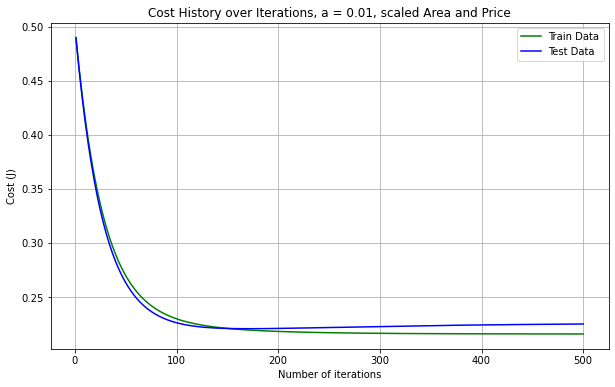

In [48]:
plt.plot(range(1, iterations + 1),cost_historyTrainC1S, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestC1S, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

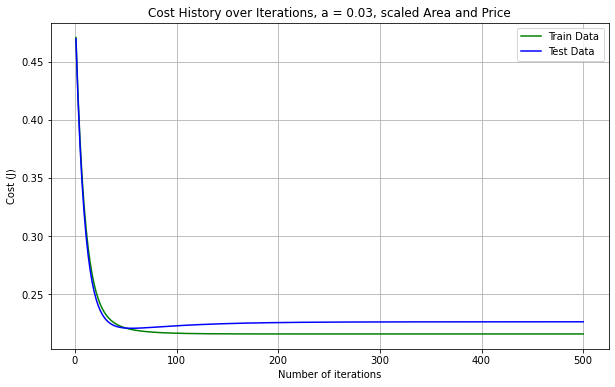

In [49]:
plt.plot(range(1, iterations + 1),cost_historyTrainC2S, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestC2S, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.03, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

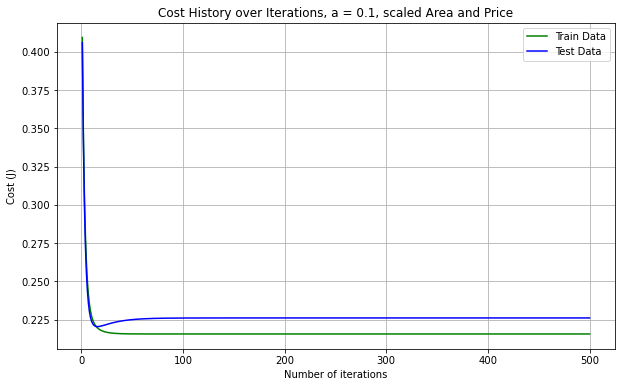

In [50]:
plt.plot(range(1, iterations + 1),cost_historyTrainC3S, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestC3S, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.1, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

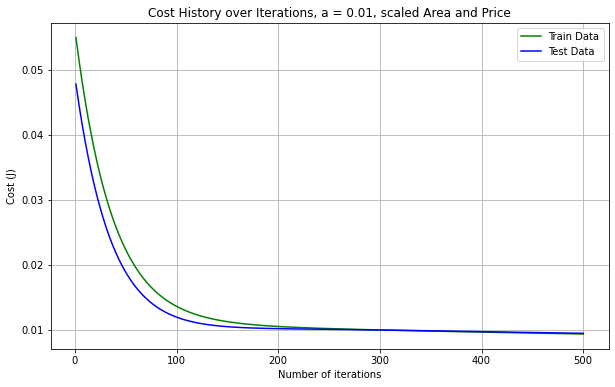

In [51]:
plt.plot(range(1, iterations + 1),cost_historyTrainC1M, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestC1M, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

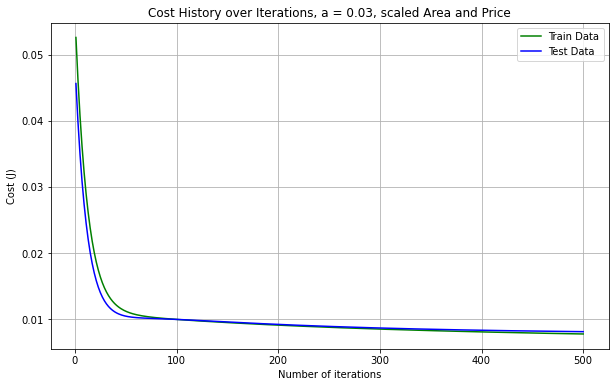

In [52]:
plt.plot(range(1, iterations + 1),cost_historyTrainC2M, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestC2M, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.03, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

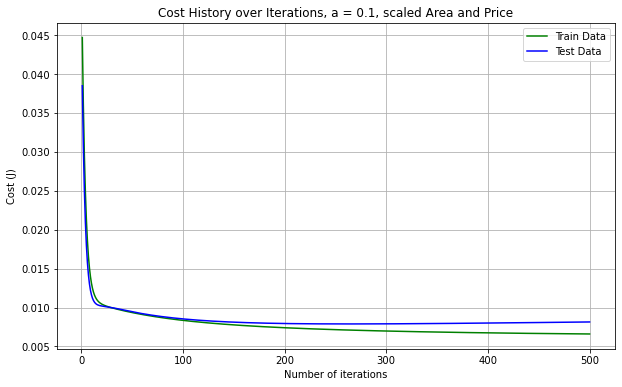

In [53]:
plt.plot(range(1, iterations + 1),cost_historyTrainC3M, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestC3M, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.1, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

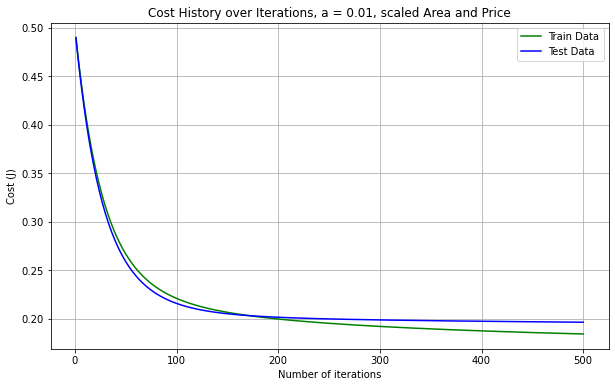

In [60]:
plt.plot(range(1, iterations + 1),cost_historyTrainD1S, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestD1S, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

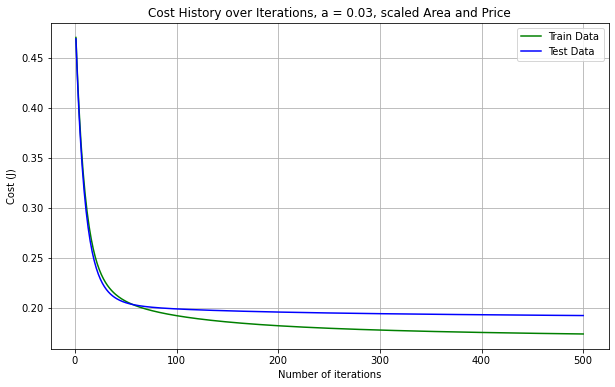

In [61]:
plt.plot(range(1, iterations + 1),cost_historyTrainD2S, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestD2S, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.03, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

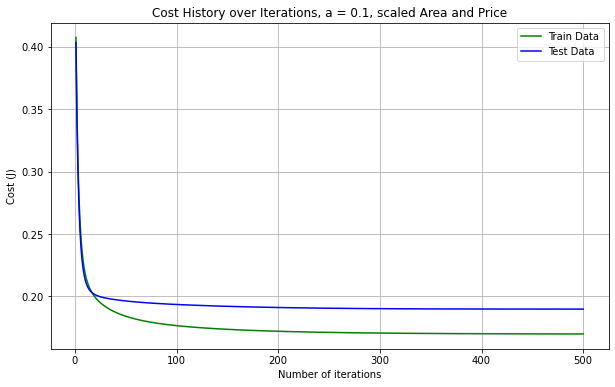

In [62]:
plt.plot(range(1, iterations + 1),cost_historyTrainD3S, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestD3S, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.1, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

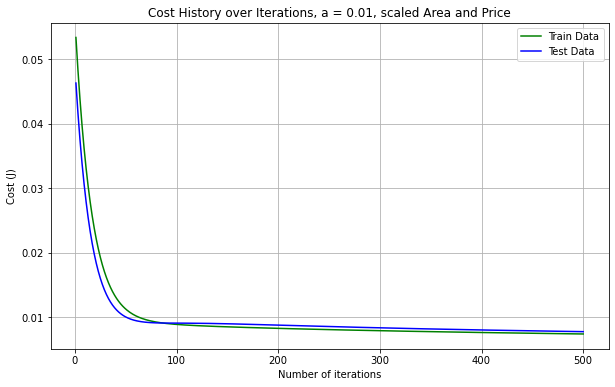

In [63]:
plt.plot(range(1, iterations + 1),cost_historyTrainD1M, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestD1M, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

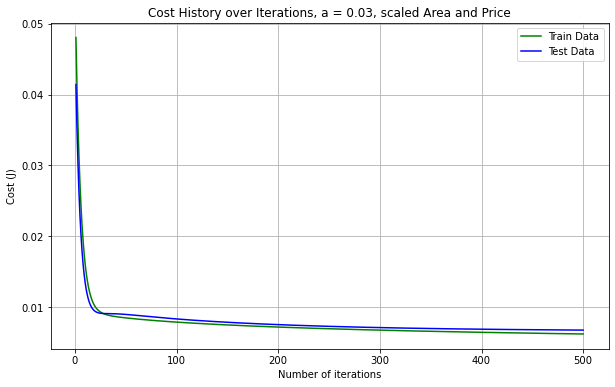

In [64]:
plt.plot(range(1, iterations + 1),cost_historyTrainD2M, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestD2M, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.03, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()

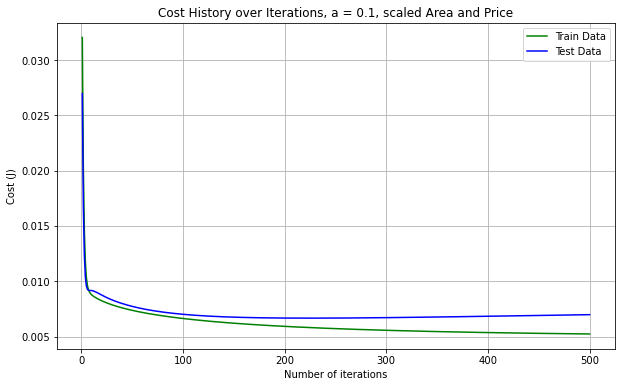

In [65]:
plt.plot(range(1, iterations + 1),cost_historyTrainD3M, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestD3M, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.1, scaled Area and Price')
#plt.xlim([-10, 200])
#plt.ylim([0.015, 0.03])
plt.legend()